In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [57]:
# this class defines everything we need to construct an orbit around the Sun. 
# do not edit this!!!

class Orbit(object):
    def __init__(self, a=1.0, e=0.0):
        self.a = a
        self.e = e

        # we'll work internally in units of M = solar masses, L = AU, and t = years
        self.GM = 4*np.pi**2
    
        # initial conditions -- we'll start at perihelion
        self.x0 = a*(1.0 - e)
        self.y0 = 0.0
        
        self.vx0 = 0.0
        self.vy0 = np.sqrt((self.GM/a)*(1.0+e)/(1.0-e))
        
        # storage for the integration results
        self.t = None
        self.x = None
        self.y = None
        self.vx = None
        self.vy = None
        
    def period(self):
        # return the orbital period in years
        return np.sqrt(4*np.pi**2*self.a**3/self.GM)
        
    def integrate(self, num_years=1.0):
        # integrate using the scipy RK integrator with dense output
        r = integrate.ode(self.rhs)
        r.set_integrator("dopri5", atol=1.e-6, rtol=1.e-6)

        # dense output
        sol = []
        r.set_solout(lambda t, y: sol.append([t, *y]))
        
        Y0 = np.array([self.x0, self.y0, self.vx0, self.vy0])
        r.set_initial_value(Y0, 0.0)
        r.set_f_params(self.GM)
        
        # integrate
        r.integrate(num_years)
        
        q = np.array(sol)
        self.t = q[:,0]
        self.x = q[:,1]
        self.y = q[:,2]
        self.vx = q[:,3]
        self.vy = q[:,4]
        
    @staticmethod
    def rhs(t, Y, GM):
        x, y, vx, vy = Y
        f = np.zeros_like(Y)
        
        # dx/dt = vx
        f[0] = vx
        
        # dy/dt = vy
        f[1] = vy
        
        # d(vx)/dt = -GMx/r**3
        r = np.sqrt(x**2 + y**2)
        f[2] = -GM*x/r**3
        
        # d(vy)/dt = -GMy/r**3
        f[3] = -GM*y/r**3
    
        return f
    
    def plot(self):
        plt.subplot(211)
        plt.plot(self.x, self.y)
        plt.xlabel("x [AU]")
        plt.ylabel("y [AU]")
        
        # foci
        plt.scatter([0], [0], marker="x")
        
        ax = plt.gca()
        ax.set_aspect("equal", "datalim")
        
        plt.subplot(212)
        plt.plot(self.t, self.x, label="x [AU]")
        plt.plot(self.t, self.y, label="y [AU]")
        plt.plot(self.t, self.vx, label="vx [AU/yr]")
        plt.plot(self.t, self.vy, label="vy [AU/yr]")
        
        plt.xlabel("t [yr]")
        plt.legend(frameon=False)
        
        f = plt.gcf()
        f.set_size_inches(6.0, 9.0)
        
    def data(self):
        for n in range(len(self.t)):
            print("{:12.6g}: {:12.6g}, {:12.6g}, {:12.6g}, {:12.6g}".format(
                    self.t[n], self.x[n], self.y[n], self.vx[n], self.vy[n]))
        
        
        

In [58]:
# work with an orbit.  Here we create an orbit object, o
# we then integrate it, solving Newton's laws
o = Orbit(e=0.4)
o.integrate()

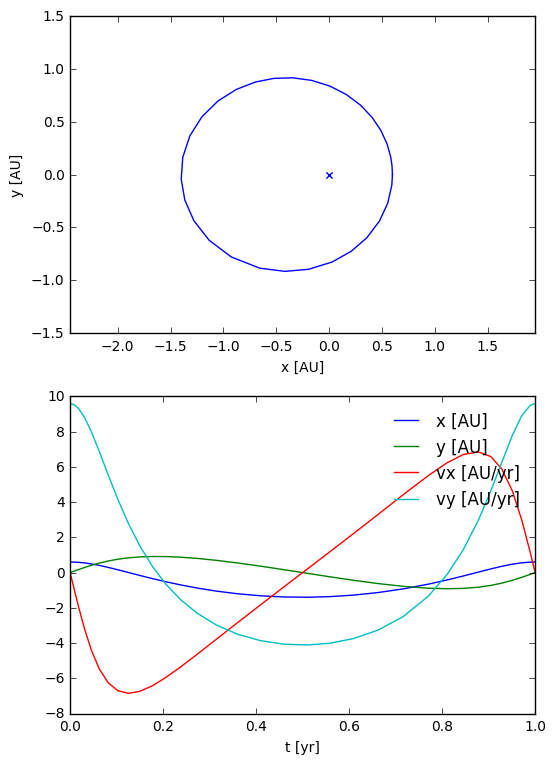

In [59]:
o.plot()

In [60]:
o.data()

           0:          0.6,            0,            0,      9.59772
   0.0088989:     0.595669,    0.0852038,    -0.970725,      9.52865
   0.0181433:     0.582147,     0.172412,     -1.94679,       9.3155
   0.0310369:      0.54881,     0.289479,     -3.19839,       8.8059
   0.0456919:       0.4928,     0.412846,      -4.4025,      7.99731
   0.0626115:     0.408847,     0.538928,     -5.46171,      6.88562
   0.0814291:     0.298121,     0.656206,     -6.24159,      5.57782
    0.102307:     0.162345,     0.757869,     -6.70345,      4.17817
    0.125275:   0.00605148,     0.837557,     -6.85535,      2.79174
    0.150371:    -0.165032,     0.890855,     -6.74084,      1.49346
    0.177514:    -0.343957,     0.915074,     -6.41718,     0.330131
    0.206359:    -0.522479,     0.909614,     -5.94466,    -0.672373
    0.236987:     -0.69584,     0.875489,     -5.36686,     -1.52336
    0.273364:     -0.87783,     0.805114,     -4.63383,     -2.31011
    0.314409:     -1.05066,     0.